In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서도 아래 설치 문구의 주석을 제거하고 설치하고 import 해주기만 하면 한글폰트가 잘 나옵니다.
!pip install koreanize-matplotlib

import koreanize_matplotlib as kplt

# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")


## 📌 Q1. 연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!


🔽 출력 예시
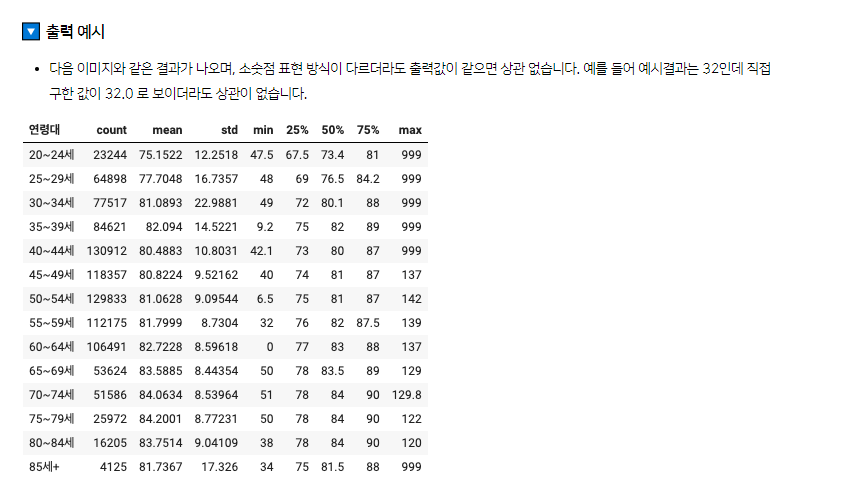

In [ ]:
df.head(5)

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


### A1

In [ ]:
# 딕셔너리
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

# '연령대코드(5세단위)'를 '연령대'로 매핑
df['연령대'] = df['연령대코드(5세단위)'].map(age_code)

# '연령대'별 '허리둘레'의 기술통계 계산
result = df.groupby('연령대')['허리둘레'].describe()

print(result)

           count       mean        std   min   25%   50%   75%    max
연령대                                                                  
20~24세   23244.0  75.152220  12.251781  47.5  67.5  73.4  81.0  999.0
25~29세   64898.0  77.704783  16.735734  48.0  69.0  76.5  84.2  999.0
30~34세   77517.0  81.089268  22.988111  49.0  72.0  80.1  88.0  999.0
35~39세   84621.0  82.094012  14.522095   9.2  75.0  82.0  89.0  999.0
40~44세  130912.0  80.488308  10.803098  42.1  73.0  80.0  87.0  999.0
45~49세  118357.0  80.822449   9.521622  40.0  74.0  81.0  87.0  137.0
50~54세  129833.0  81.062754   9.095438   6.5  75.0  81.0  87.0  142.0
55~59세  112175.0  81.799905   8.730398  32.0  76.0  82.0  87.5  139.0
60~64세  106491.0  82.722769   8.596176   0.0  77.0  83.0  88.0  137.0
65~69세   53624.0  83.588500   8.443542  50.0  78.0  83.5  89.0  129.0
70~74세   51586.0  84.063372   8.539639  51.0  78.0  84.0  90.0  129.8
75~79세   25972.0  84.200127   8.772306  50.0  78.0  84.0  90.0  122.0
80~84세   16205.0  83

## 📌Q2. "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.

다음의 결과가 나오도록 합니다. 이 때 그래프의 색상, 스타일 표현방식에 차이가 있더라도 상관계수값이 차이가 없다면 문제 없습니다.

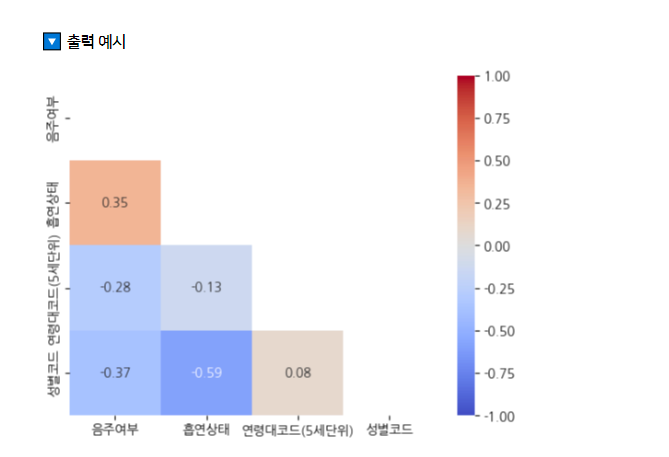

### A2

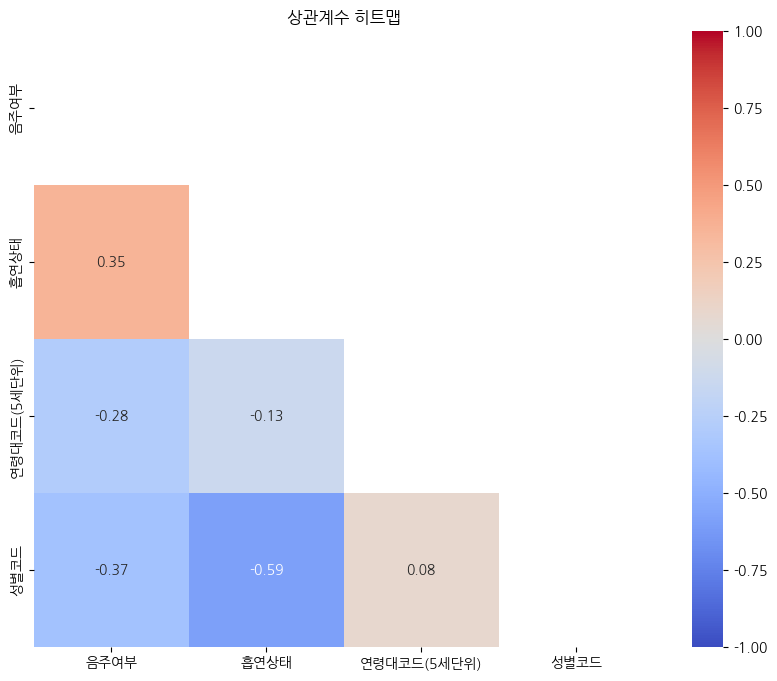

In [ ]:
import matplotlib.pyplot as plt
# 상관계수 계산
correlation = df[['음주여부', '흡연상태', '연령대코드(5세단위)', '성별코드']].corr()

# 상관계수 계산
correlation = df[['음주여부', '흡연상태', '연령대코드(5세단위)', '성별코드']].corr()

# 상삼각행렬 마스크
mask = np.triu(np.ones_like(correlation, dtype=bool))

# 상관계수 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=mask)
plt.title("상관계수 히트맵")
plt.show()

## 📌 Q3. 흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?

건강보험에서 제공하고 있는 데이터는 용량을 줄이기 위해 대부분의 데이터를 숫자 형태로 제공하고 있습니다. replace 기능을 사용하면 딕셔너리의 값을 의미하는 문자 형태로 변경해 볼 수 있습니다. 다음 제공되는 딕셔너리 값을 사용하여 숫자가 의미하는 문자 형태로 변경한 뒤 전체 데이터에서 음주와 흡연에 대한 교차 테이블을 구해 각 해당 빈도수를 구하고 시각화 해주세요!

In [ ]:
# 흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
# 음주 0(마시지 않은다), 1(마신다)
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

# df["흡연"]
# df["음주"]

* groupby, pivot_table로 구할 수도 있지만, 수업에서는 다루지 않았던 pandas의 crosstab 기능을 사용해서도 비교적 쉽게 구할 수 있습니다.
* crosstab 을 사용할 때는 다음의 문서를 참고하여 구해보세요. pandas.crosstab — pandas documentation
* 그리고 막대그래프를 통해 결과를 시각화해주세요! 시각화를 할 때 그래프의 스타일이나 막대의 색상 등이 달라도 상관 없으니 사용하고 싶은 스타일을 적용해서 시각화해도 좋습니다.

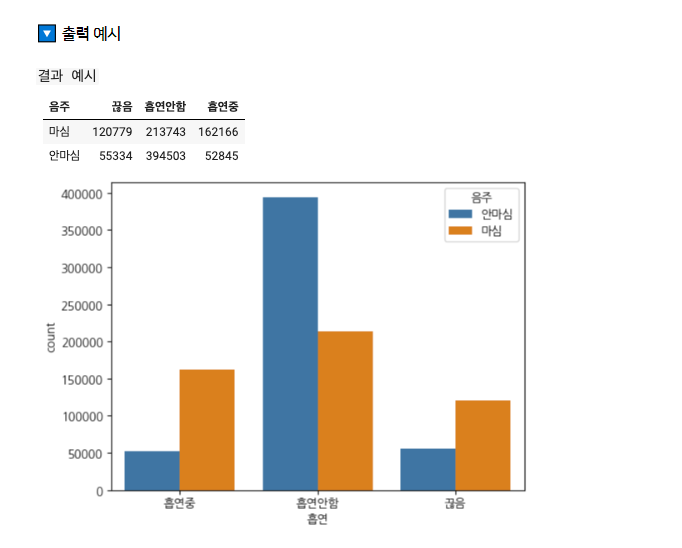

### A3

# 새 섹션

In [ ]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자', '연령대'],
      dtype='object')

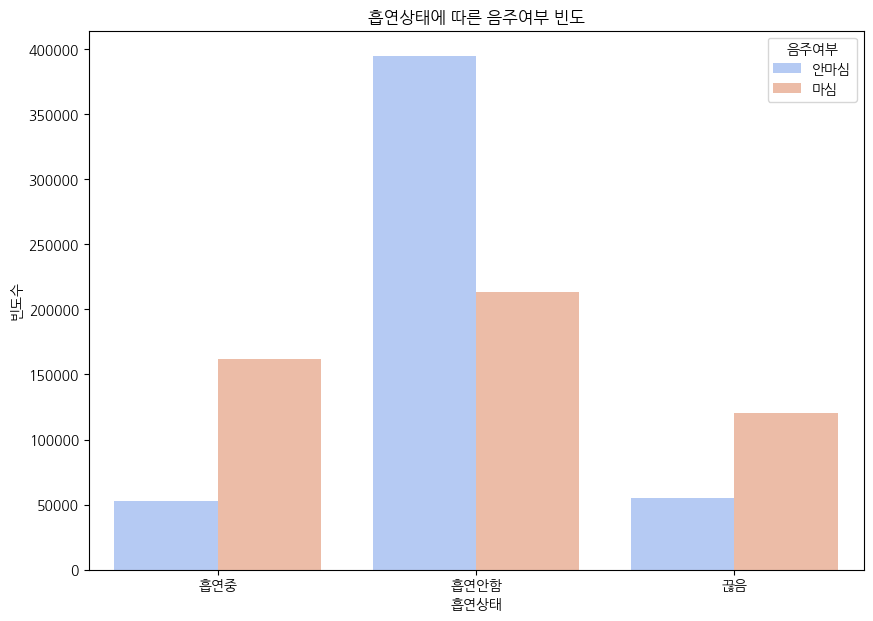

In [ ]:
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

# 값을 문자 형태로 변경
df['음주여부'] = df['음주여부'].replace(drink)
df['흡연상태'] = df['흡연상태'].replace(smoke)

# 교차 테이블 생성
cross_table = pd.crosstab(df['음주여부'], df['흡연상태'])

# 막대그래프 시각화
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='흡연상태', hue='음주여부', palette='coolwarm')
plt.title("흡연상태에 따른 음주여부 빈도")
plt.ylabel("빈도수")
plt.show()

## 📌 Q4. 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!

체중이 120Kg 이 넘는다면 비만으로 건강관리가 필요합니다. 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요! (이때 120Kg 도 포함되게 구합니다.) 그래프의 설정과 seaborn 버전에 따라 여백이나 회귀선의 시작과 끝점에 차이가 있을 수 있습니다.

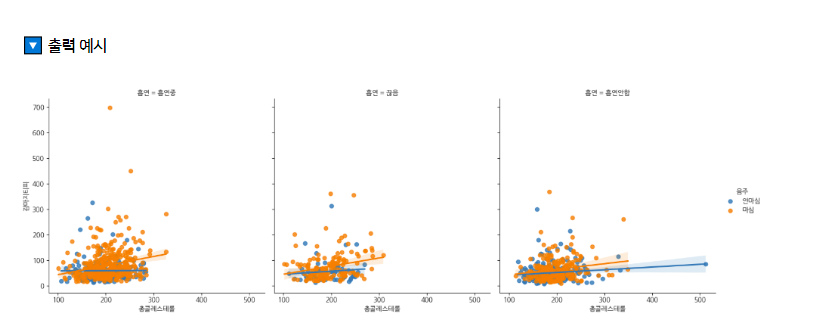

### A4

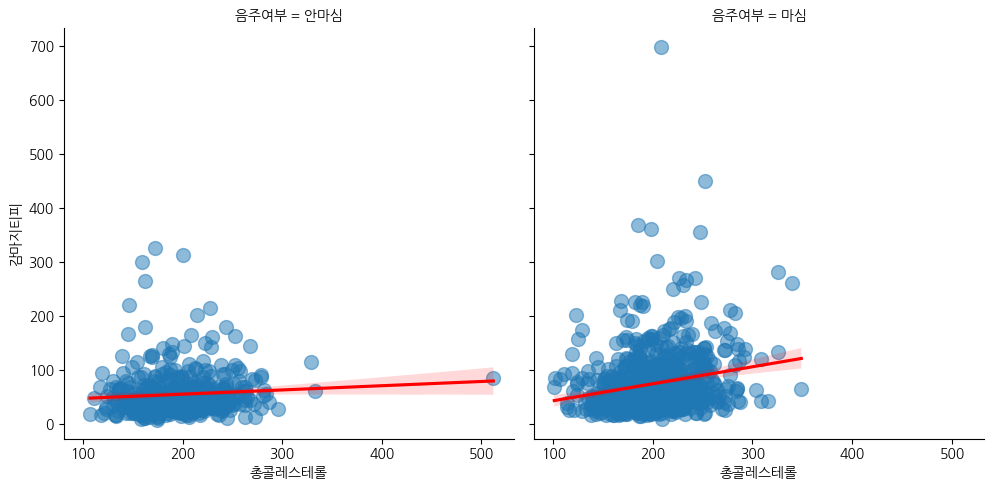

In [ ]:
# '체중(5Kg 단위)'가 120 이상인 데이터 필터링
filtered_df = df[df['체중(5Kg 단위)'] >= 120]

# '음주여부'에 따라 각각의 산점도 및 회귀선 그리기
g = sns.FacetGrid(filtered_df, col="음주여부", height=5, aspect=1, palette='dark')
g.map(sns.regplot, "총콜레스테롤", "감마지티피", scatter_kws={'s': 100, 'alpha': 0.5}, line_kws={'color': 'red'})
g.add_legend()

plt.show()

## 📌 Q5. 연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!

* 시력은 0.1~2.5 사이의 값으로 표기하며 0.1 이하의 시력은 0.1, 실명은 9.9로 표기합니다.

* 실명인 데이터를 평균에 포함하게 되면 시력에 대한 평균을 제대로 구하기 어렵습니다. 실명 데이터를 제외하고 연령대, 성별에 따른 평균 좌우 시력을 구해주세요!

* 서브플롯으로 시각화하여 표현해 주고 matplotlib 에 대한 사용법은 다음의 영상도 함께 참고해 주세요! (https://www.youtube.com/watch?v=ZTRKojTLE8M)

* 시각화 예시는 참고사항으로 스타일이나 폰트 구성이 달라도 연령대, 성별 좌우평균시력을 시각화 하면 됩니다.

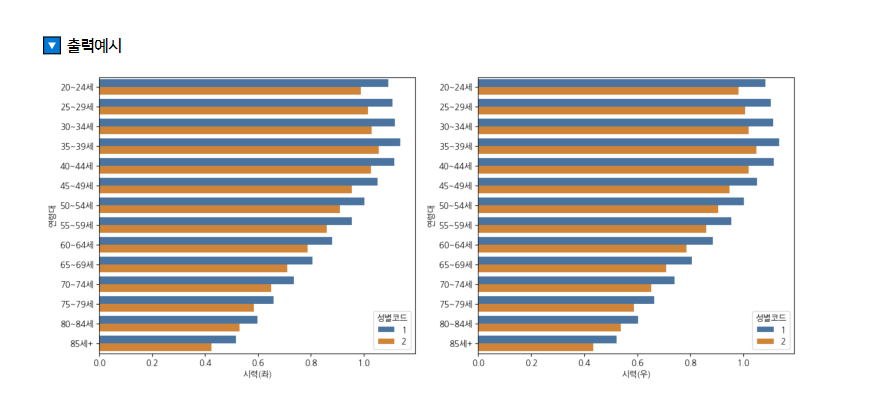

### A5

In [ ]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자', '연령대'],
      dtype='object')

In [ ]:
df['시력(좌)'].describe()

count    999712.000000
mean          0.978897
std           0.610948
min           0.100000
25%           0.700000
50%           1.000000
75%           1.200000
max           9.900000
Name: 시력(좌), dtype: float64

<ipython-input-50-75cd8c4ce409>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_vision = df_Q5.groupby(['연령대', '성별코드']).mean().reset_index()


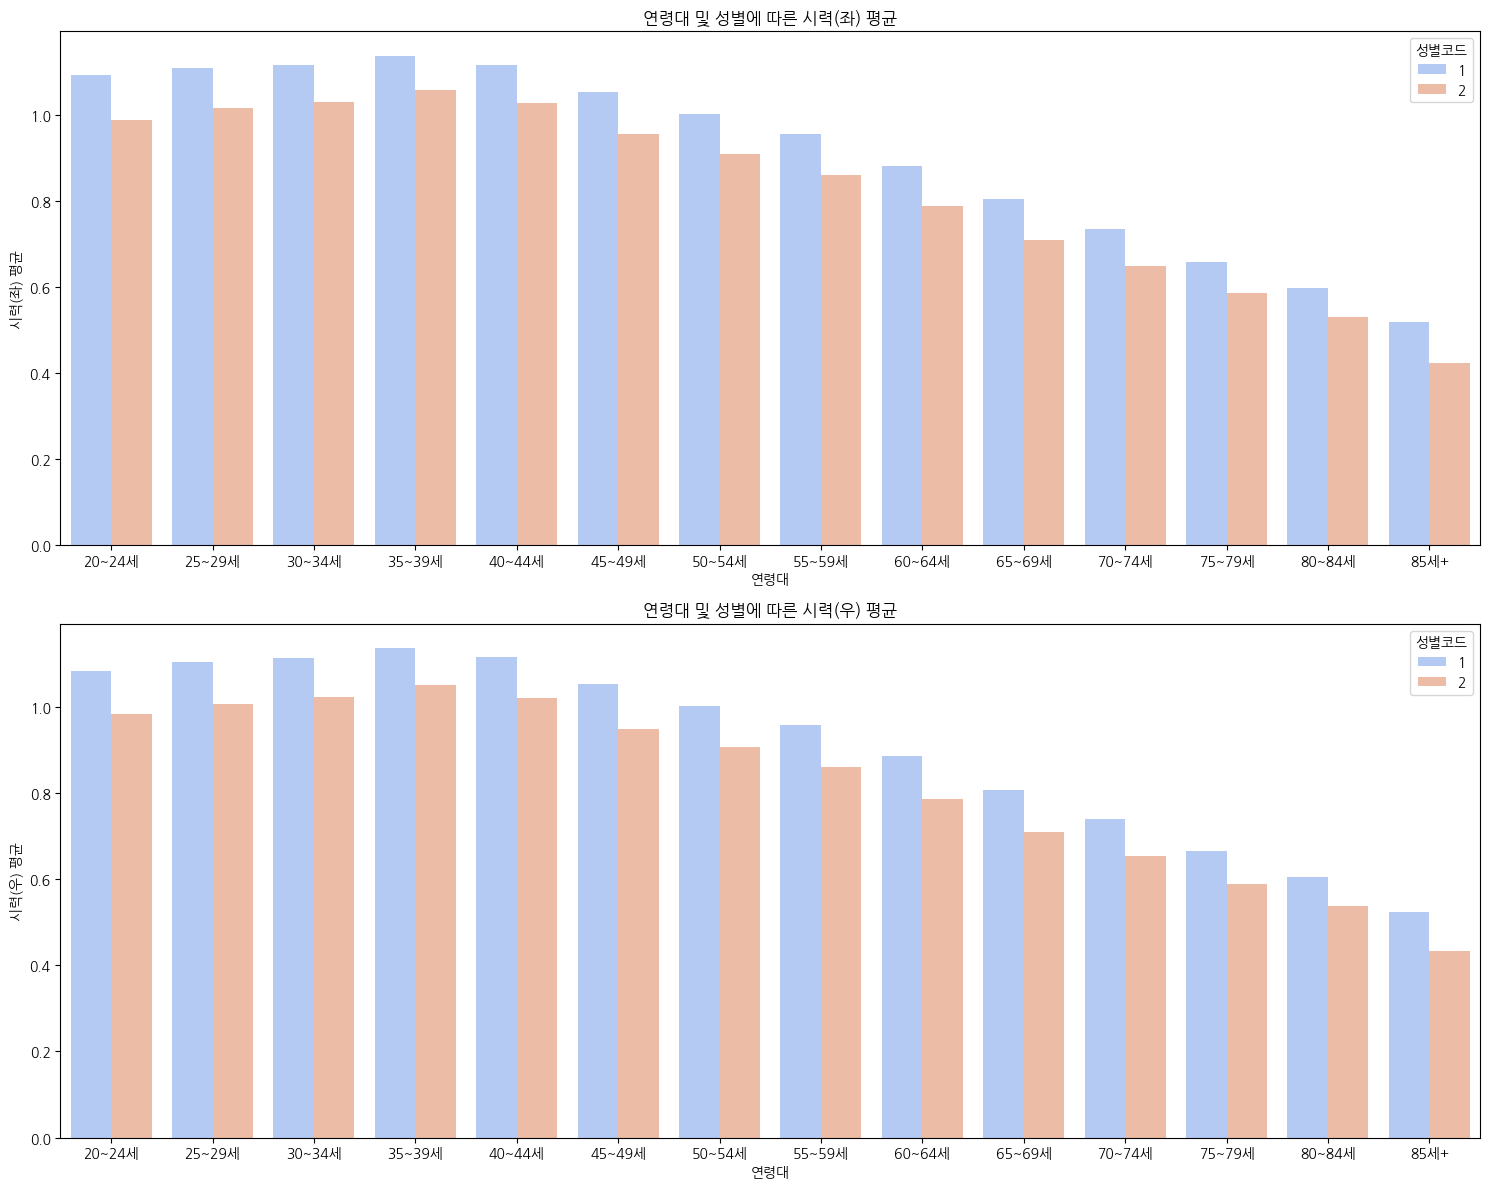

In [ ]:
# '시력(좌)'와 '시력(우)'에서 9.9 값을 제외
df_Q5 = df[(df['시력(좌)'] != 9.9) & (df['시력(우)'] != 9.9)]

# '연령대'와 '성별코드'에 따른 '시력(좌)'와 '시력(우)'의 평균 계산
average_vision = df_Q5.groupby(['연령대', '성별코드']).mean().reset_index()

# 평균을 시각화
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

sns.barplot(data=average_vision, x='연령대', y='시력(좌)', hue='성별코드', palette='coolwarm', ax=axes[0])
axes[0].set_title('연령대 및 성별에 따른 시력(좌) 평균')
axes[0].set_ylabel('시력(좌) 평균')

sns.barplot(data=average_vision, x='연령대', y='시력(우)', hue='성별코드', palette='coolwarm', ax=axes[1])
axes[1].set_title('연령대 및 성별에 따른 시력(우) 평균')
axes[1].set_ylabel('시력(우) 평균')

plt.tight_layout()
plt.show()